In [37]:
import pandas as pd
import json
import glob
import os
import collections

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

plotly.offline.init_notebook_mode(connected=True) 

%matplotlib inline

In [14]:
def read_formatted_jsons(INDIR,domain):
    generation_dfs = []
    stats_dicts = []
    
#     for domain in os.listdir(INDIR):
    for fname in glob.glob(INDIR+"*.json"):

        org_id = os.path.basename(fname).strip(".json")

        with open(fname) as f:
            datajson = json.load(f)

        datajson["stats"]["org_id"] = org_id
        datajson["stats"]["domain"] = domain
        datajson["stats"]["path"] = fname

        stats_dicts.append(datajson["stats"])
        generation_dfs.append(pd.DataFrame(datajson["generations"]))
            
    return generation_dfs, stats_dicts

In [11]:
def read_formatted_json_single(INDIR):
    generation_dfs = []
    stats_dicts = []
    
#     for domain in os.listdir(INDIR):
    for fname in glob.glob(INDIR+"*.json"):

        org_id = os.path.basename(fname).strip(".json")

        with open(fname) as f:
            datajson = json.load(f)

        datajson["stats"]["org_id"] = org_id
        datajson["stats"]["domain"] = domain
        datajson["stats"]["path"] = fname

        stats_dicts.append(datajson["stats"])
        generation_dfs.append(pd.DataFrame(datajson["generations"]))
            
    return generation_dfs, stats_dicts

### Transpose etc.

In [4]:
def twist_dfs(df_list):
    twisted_dfs = []
    for df in df_list:
        df = df.transpose()
        df.index = df.index.astype(int)
        df = df.sort_index()   
        twisted_dfs.append(df)
    return twisted_dfs

### Add `n` columns

In [5]:
def add_n_to_cols(df_list):
    for df in df_list:
        original_columns = df.columns
        for col in original_columns:
            df["n_"+col] = df[col].str.len() 
    return df_list

### Add domain and org_id

In [6]:
def add_domain_and_orgid(df_list,stats_dicts):
    for i,df in enumerate(df_list):
        df['org_id'] = stats_dicts[i]["org_id"]
        df['domain'] = stats_dicts[i]["domain"]
    return df_list

### Add tags if desired

In [7]:
def add_tags(df_list,cpds_to_tag):
    for df in df_list:
        df['tags'] = df['compounds_new'].apply(lambda x: [cpd for cpd in cpds_to_tag if cpd in x])
    return df_list

### Main

In [15]:
cpds_to_tag = []

INDIR = "../results/formatted/minimal_seed_randomizations_fixed/archaea/2506520044/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR,"archaea")
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
# print generation_dfs
df = pd.concat(generation_dfs)

In [34]:
seed_compounds_all = []
for gendf in generation_dfs:
    seed_compounds_all.append(gendf.iloc[1]["compounds_cumulative"])

In [41]:
len(seed_compounds_all)

58

In [38]:
collections.Counter([c for clist in seed_compounds_all for c in clist])

Counter({u'C00001': 33,
         u'C00002': 4,
         u'C00003': 4,
         u'C00004': 1,
         u'C00007': 10,
         u'C00008': 2,
         u'C00009': 4,
         u'C00010': 5,
         u'C00011': 43,
         u'C00013': 5,
         u'C00014': 11,
         u'C00016': 35,
         u'C00019': 5,
         u'C00020': 3,
         u'C00021': 6,
         u'C00022': 3,
         u'C00024': 5,
         u'C00025': 1,
         u'C00026': 1,
         u'C00027': 6,
         u'C00028': 1,
         u'C00029': 3,
         u'C00032': 5,
         u'C00033': 3,
         u'C00035': 2,
         u'C00036': 3,
         u'C00037': 1,
         u'C00039': 7,
         u'C00040': 4,
         u'C00043': 4,
         u'C00044': 2,
         u'C00046': 6,
         u'C00047': 46,
         u'C00048': 2,
         u'C00049': 1,
         u'C00051': 1,
         u'C00052': 3,
         u'C00053': 3,
         u'C00054': 14,
         u'C00055': 2,
         u'C00059': 32,
         u'C00061': 6,
         u'C00062': 4,
   

In [40]:
collections.Counter([c for clist in seed_compounds_all for c in clist if c in stats_dicts[0]['scope_targets']])

Counter({u'C00002': 4,
         u'C00003': 4,
         u'C00004': 1,
         u'C00008': 2,
         u'C00016': 35,
         u'C00020': 3,
         u'C00024': 5,
         u'C00025': 1,
         u'C00035': 2,
         u'C00037': 1,
         u'C00043': 4,
         u'C00044': 2,
         u'C00047': 46,
         u'C00049': 1,
         u'C00054': 14,
         u'C00055': 2,
         u'C00062': 4,
         u'C00063': 1,
         u'C00073': 2,
         u'C00075': 1,
         u'C00079': 4,
         u'C00082': 1,
         u'C00097': 1,
         u'C00105': 3,
         u'C00112': 1,
         u'C00131': 4,
         u'C00144': 2,
         u'C00148': 42,
         u'C00234': 8,
         u'C00239': 1,
         u'C00255': 18,
         u'C00286': 13,
         u'C00350': 31,
         u'C00362': 23,
         u'C00364': 2,
         u'C00399': 20,
         u'C00458': 1,
         u'C00748': 7})

In [42]:
[clist for clist in seed_compounds_all if len(set(clist) & set(stats_dicts[0]['scope_targets']))==0]

[]

In [44]:
[len(set(clist) & set(stats_dicts[0]['scope_targets'])) for clist in seed_compounds_all]

[8,
 6,
 2,
 6,
 6,
 8,
 3,
 2,
 5,
 4,
 5,
 6,
 4,
 7,
 6,
 5,
 6,
 6,
 4,
 7,
 5,
 5,
 5,
 7,
 4,
 8,
 6,
 7,
 3,
 7,
 4,
 5,
 7,
 5,
 11,
 4,
 7,
 6,
 5,
 6,
 2,
 6,
 5,
 6,
 4,
 4,
 4,
 4,
 9,
 2,
 4,
 6,
 4,
 5,
 12,
 8,
 3,
 6]

In [45]:
encel = ["C00001","C00011","C00237","C00282","C00067","C00132","C06548","C00469","C00283","C00014","C00697","C01326","C01438","C01548","C06547","C11505","C20783","C01407"]
    

In [47]:
[(set(clist) & set(encel)) for clist in seed_compounds_all]

[{'C00067'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011', 'C00282'},
 {'C00001', 'C00011', 'C00014', 'C00283'},
 {'C00001', 'C00011', 'C00067'},
 {'C00001', 'C00011'},
 {'C00011'},
 {'C00011', 'C00014'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011'},
 {'C00011', 'C00067'},
 {'C00067', 'C00283'},
 {'C00001'},
 {'C00011', 'C00014'},
 {'C00011', 'C00067'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011', 'C00283'},
 {'C00011', 'C00283'},
 {'C00001'},
 {'C00011'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011', 'C00283'},
 {'C00001', 'C00011'},
 {'C00011', 'C00014'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011', 'C00282'},
 {'C00001', 'C00011'},
 set(),
 {'C00001', 'C00011', 'C00283'},
 {'C00011', 'C00014'},
 {'C00014'},
 {'C00001', 'C00011'},
 {'C00001', 'C00011'},
 {'C00011', 'C00014'},
 {'C00282'},
 {'C00001', 'C00011', 'C00067'},
 {'C00001', 'C00011'},
 {'C00001'},
 {'C00001', 'C00011', 'C00067'},
 {'C00001', 'C00011'},
 {'C00011', 'C00014'},
 {'C00011'},
 {'C00011', 'C00

In [43]:
set(stats_dicts[0]['scope_targets'])

{u'C00002',
 u'C00003',
 u'C00004',
 u'C00005',
 u'C00006',
 u'C00008',
 u'C00015',
 u'C00016',
 u'C00020',
 u'C00024',
 u'C00025',
 u'C00035',
 u'C00037',
 u'C00041',
 u'C00043',
 u'C00044',
 u'C00047',
 u'C00049',
 u'C00054',
 u'C00055',
 u'C00062',
 u'C00063',
 u'C00064',
 u'C00065',
 u'C00073',
 u'C00075',
 u'C00078',
 u'C00079',
 u'C00082',
 u'C00097',
 u'C00105',
 u'C00112',
 u'C00116',
 u'C00123',
 u'C00131',
 u'C00135',
 u'C00144',
 u'C00148',
 u'C00152',
 u'C00183',
 u'C00188',
 u'C00234',
 u'C00239',
 u'C00249',
 u'C00255',
 u'C00286',
 u'C00350',
 u'C00360',
 u'C00362',
 u'C00364',
 u'C00399',
 u'C00407',
 u'C00458',
 u'C00459',
 u'C00748'}

In [32]:
generation_dfs[0].iloc[1]["compounds_cumulative"]

[u'C00016',
 u'C00343',
 u'C14818',
 u'C19154',
 u'C19155',
 u'C19153',
 u'C00079',
 u'C00144',
 u'C00067',
 u'C00844',
 u'C00399',
 u'C00148',
 u'C00234',
 u'C00047',
 u'C00327',
 u'C04896',
 u'C00269',
 u'C00332',
 u'C00330',
 u'C00061',
 u'C00054',
 u'C03125',
 u'C04916',
 u'C17401']

In [16]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00016, C00343, C14818, C19153, C00079, C0014...","[C00332, C00343, C00079, C14818, C00067, C0006...","[R09398, R04640]","[R04640, R09398]","[C00016, C00079, C00144, C00399, C00148, C0023...","[C00144, C00079, C00234, C00148, C00016, C0004...",21,21,2,2,8,8,1,archaea
2,"[C00016, C00343, C14818, C19154, C19155, C1915...","[C19154, C19155, C04896]","[R09398, R04037, R04640]",[R04037],"[C00016, C00079, C00144, C00399, C00148, C0023...",[],24,3,3,1,8,0,1,archaea
3,"[C00016, C00001, C00343, C14818, C19154, C1915...","[C00001, C02741]","[R09398, R00602, R02558, R04037, R04640, R0122...","[R00602, R02558, R01227, R00944]","[C00016, C00079, C00144, C00399, C00148, C0023...",[],26,2,7,4,8,0,1,archaea
4,"[C00016, C00009, C00001, C00343, C14818, C1915...","[C00009, C00031, C00101, C00058, C00132, C0002...","[R09398, R00010, R01968, R00306, R02985, R0139...","[R00010, R01968, R00306, R02985, R01398, R0000...","[C00016, C00079, C00144, C00399, C00148, C0023...",[],34,8,14,7,8,0,1,archaea
5,"[C00016, C00009, C00007, C00001, C00343, C1481...","[C00007, C00013, C01083, C00169, C00362, C0018...","[R09398, R11308, R04035, R00010, R01968, R0027...","[R11308, R04035, R00275, R02778, R01229, R0939...","[C00016, C00079, C00144, C00362, C00399, C0014...",[C00362],42,8,23,9,9,1,1,archaea


In [27]:
len(df)

2327

### Look at some properties of stats dicts

(array([  1.,   1.,  10.,   0.,  14.,  15.,   0.,  10.,   5.,   2.]),
 array([ 17. ,  17.7,  18.4,  19.1,  19.8,  20.5,  21.2,  21.9,  22.6,
         23.3,  24. ]),
 <a list of 10 Patch objects>)

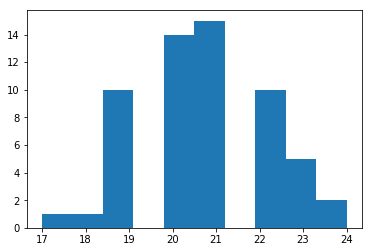

In [17]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

In [39]:
stats_dicts[0]['scope_targets']

[u'C00016',
 u'C00002',
 u'C00065',
 u'C00004',
 u'C00003',
 u'C00025',
 u'C00006',
 u'C00097',
 u'C00024',
 u'C00064',
 u'C00044',
 u'C00459',
 u'C00131',
 u'C00188',
 u'C00286',
 u'C00249',
 u'C00407',
 u'C00037',
 u'C00041',
 u'C00075',
 u'C00005',
 u'C00062',
 u'C00123',
 u'C00079',
 u'C00082',
 u'C00144',
 u'C00183',
 u'C00049',
 u'C00008',
 u'C00362',
 u'C00078',
 u'C00399',
 u'C00135',
 u'C00364',
 u'C00105',
 u'C00043',
 u'C00112',
 u'C00020',
 u'C00063',
 u'C00152',
 u'C00116',
 u'C00148',
 u'C00360',
 u'C00055',
 u'C00239',
 u'C00458',
 u'C00035',
 u'C00234',
 u'C00748',
 u'C00047',
 u'C00073',
 u'C00255',
 u'C00015',
 u'C00054',
 u'C00350']

(array([  0.,   0.,   0.,   0.,   0.,  58.,   0.,   0.,   0.,   0.]),
 array([ 54.5,  54.6,  54.7,  54.8,  54.9,  55. ,  55.1,  55.2,  55.3,
         55.4,  55.5]),
 <a list of 10 Patch objects>)

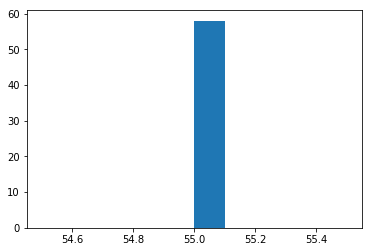

In [18]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  0.,   0.,   0.,   0.,   0.,  58.,   0.,   0.,   0.,   0.]),
 array([ 1197.5,  1197.6,  1197.7,  1197.8,  1197.9,  1198. ,  1198.1,
         1198.2,  1198.3,  1198.4,  1198.5]),
 <a list of 10 Patch objects>)

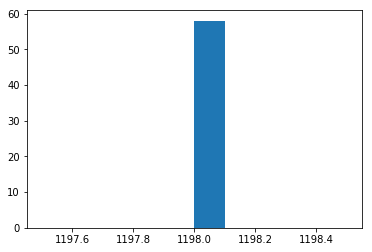

In [19]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  0.,   0.,   0.,   0.,   0.,  58.,   0.,   0.,   0.,   0.]),
 array([ 1043.5,  1043.6,  1043.7,  1043.8,  1043.9,  1044. ,  1044.1,
         1044.2,  1044.3,  1044.4,  1044.5]),
 <a list of 10 Patch objects>)

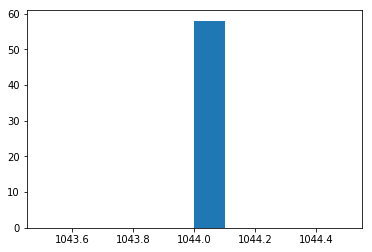

In [20]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

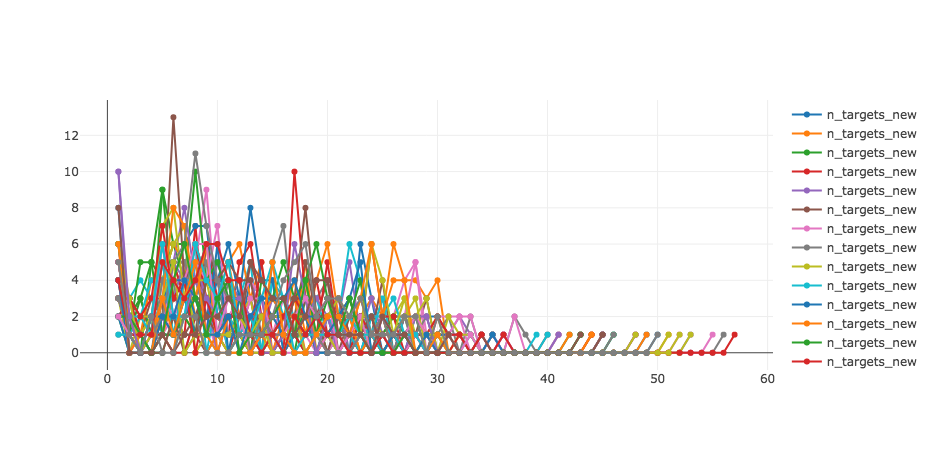

In [25]:
cool_plots_many(df,'n_targets_new')

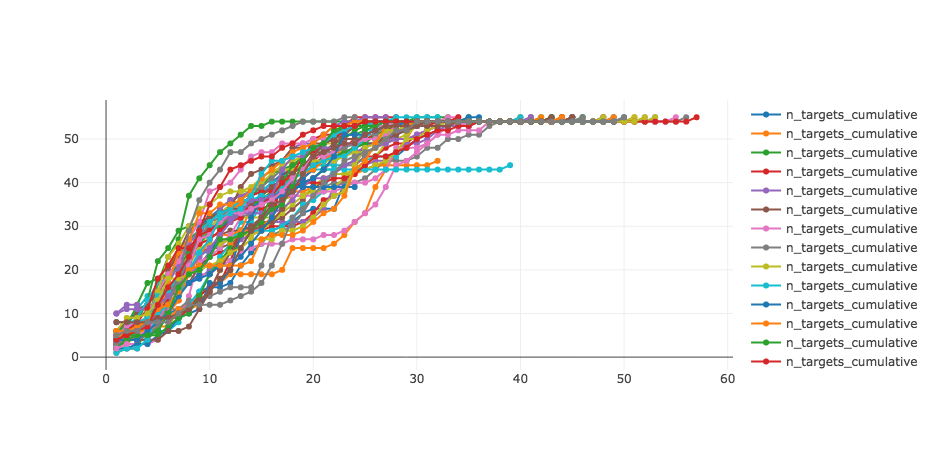

In [26]:
cool_plots_many(df,'n_targets_cumulative')

## Check seeds that contain phosphorous

In [135]:
INDIR = "../results/formatted/ph_edge_jsons_P/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [136]:
stats_dicts[0].keys()

['domain',
 u'scope_seeds',
 u'scope_targets',
 'org_id',
 u'scope_compounds',
 'path',
 u'scope_reactions']

(array([   2.,    0.,    2.,   13.,   46.,  173.,   23.,   12.,   14.,    9.]),
 array([  3. ,   4.2,   5.4,   6.6,   7.8,   9. ,  10.2,  11.4,  12.6,
         13.8,  15. ]),
 <a list of 10 Patch objects>)

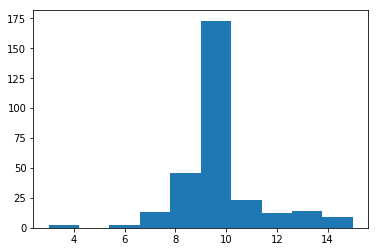

In [137]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([   1.,    0.,    0.,    1.,    2.,    4.,    8.,   19.,  107.,  152.]),
 array([ 32. ,  34.9,  37.8,  40.7,  43.6,  46.5,  49.4,  52.3,  55.2,
         58.1,  61. ]),
 <a list of 10 Patch objects>)

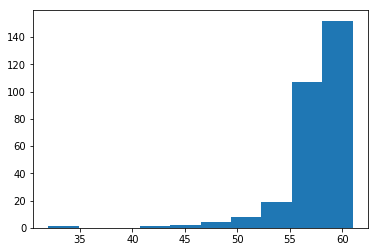

In [138]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   4.,  15.,  28.,  64.,  80.,  71.,  25.,   5.]),
 array([  161.,   331.,   501.,   671.,   841.,  1011.,  1181.,  1351.,
         1521.,  1691.,  1861.]),
 <a list of 10 Patch objects>)

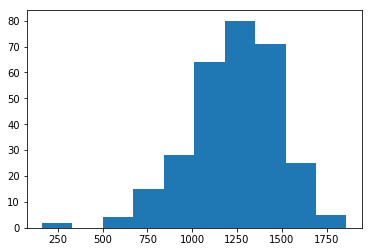

In [139]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   2.,   7.,   8.,  26.,  67.,  64.,  80.,  33.,   5.]),
 array([   85. ,   247.2,   409.4,   571.6,   733.8,   896. ,  1058.2,
         1220.4,  1382.6,  1544.8,  1707. ]),
 <a list of 10 Patch objects>)

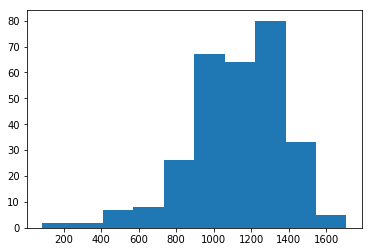

In [140]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

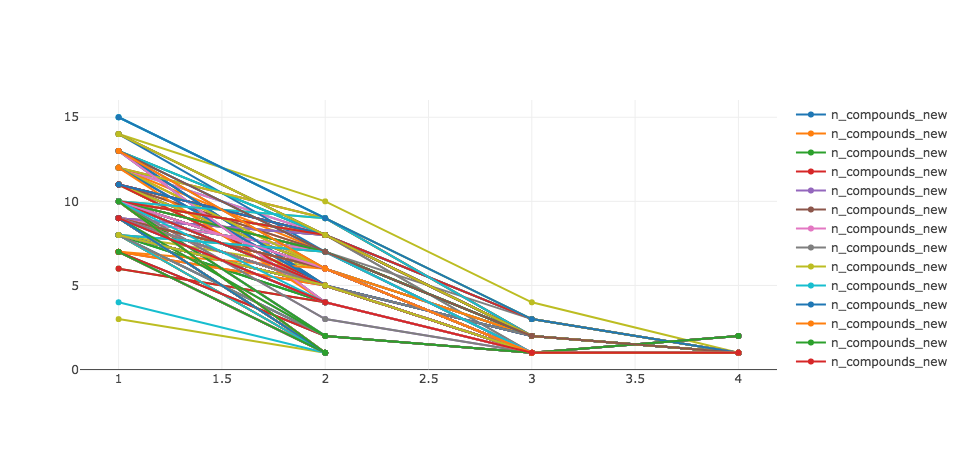

In [141]:
cool_plots_many(df,'n_compounds_new')

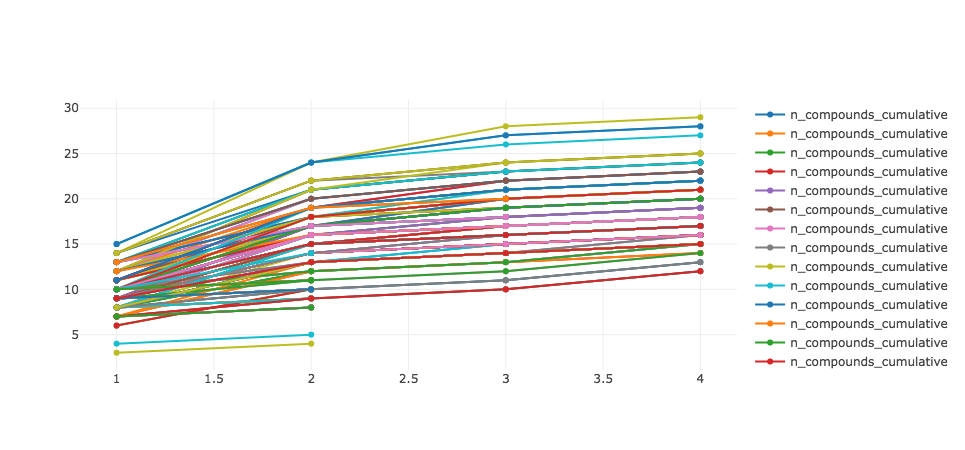

In [142]:
cool_plots_many(df,'n_compounds_cumulative')

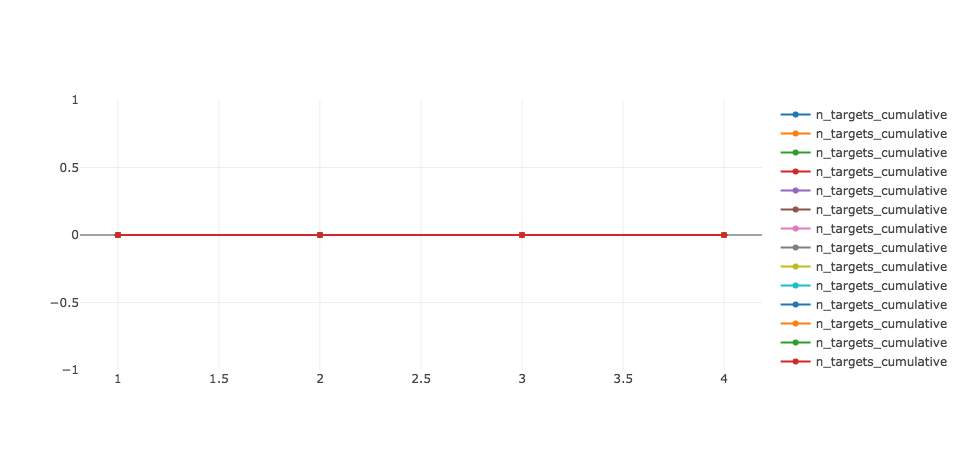

In [143]:
cool_plots_many(df,'n_targets_cumulative')

## Reversed expansions

In [144]:
INDIR = "../results/formatted/ph_edge_jsons_reversed/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [153]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00016, C00002, C00065, C00004, C00001, C0000...","[C00075, C00006, C00001, C00360, C00003, C0000...","[R00782, R00243, R00093, R10348, R00114, R0075...","[R00236, R00114, R00516, R02094, R00963, R0015...",[C00001],[C00001],56,56,73,73,1,1,2506520044,archaea
2,"[C00016, C00299, C00009, C00002, C00026, C0006...","[C00299, C00009, C00026, C00048, C00080, C0001...","[R01876, R02331, R00143, R00253, R00782, R0024...","[R01876, R02331, R00143, R00253, R02097, R1009...","[C00001, C00014, C00011, C00283]","[C00014, C00011, C00283]",109,53,196,123,4,3,2506520044,archaea
3,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C01346, C14818, C00288, C01103, C00957, C0045...","[R01876, R02331, R09186, R01388, R00143, R0107...","[R09186, R01388, R01072, R01870, R02323, R0104...","[C00001, C00014, C00011, C00067, C00469, C00283]","[C00067, C00469]",192,83,287,91,6,2,2506520044,archaea
4,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C03826, C00258, C03090, C01185, C00117, C0026...","[R01876, R02331, R09186, R01388, R00143, R0107...","[R03348, R01776, R01083, R01395, R05605, R0224...","[C00001, C00014, C00011, C00067, C00469, C0028...",[C00132],249,57,350,63,7,1,2506520044,archaea
5,"[C00016, C00299, C00009, C00002, C01346, C0002...","[C00007, C03794, C00898, C00081, C01563, C0444...","[R01876, R02331, R09186, R01388, R00143, R0007...","[R00078, R01859, R06180, R00970, R07456, R0694...","[C00001, C00014, C00011, C00067, C00469, C0028...",[],300,51,404,54,7,0,2506520044,archaea


(array([   1.,    0.,    0.,    1.,    2.,    4.,    8.,   19.,  107.,  152.]),
 array([ 33. ,  35.9,  38.8,  41.7,  44.6,  47.5,  50.4,  53.3,  56.2,
         59.1,  62. ]),
 <a list of 10 Patch objects>)

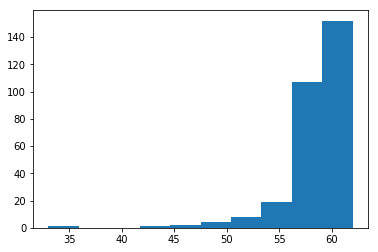

In [145]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([   2.,    0.,    2.,   13.,   46.,  173.,   23.,   12.,   14.,    9.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

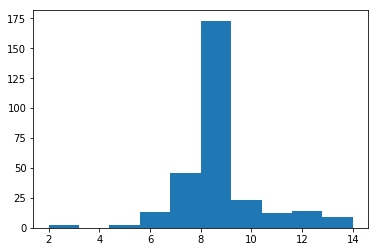

In [146]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   4.,  15.,  28.,  64.,  80.,  71.,  25.,   5.]),
 array([  161.,   331.,   501.,   671.,   841.,  1011.,  1181.,  1351.,
         1521.,  1691.,  1861.]),
 <a list of 10 Patch objects>)

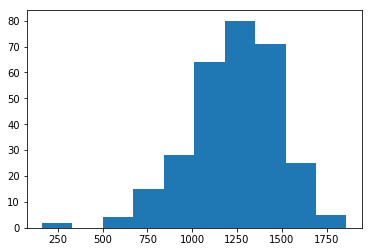

In [147]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   2.,   7.,   8.,  26.,  67.,  64.,  80.,  33.,   5.]),
 array([   85. ,   247.2,   409.4,   571.6,   733.8,   896. ,  1058.2,
         1220.4,  1382.6,  1544.8,  1707. ]),
 <a list of 10 Patch objects>)

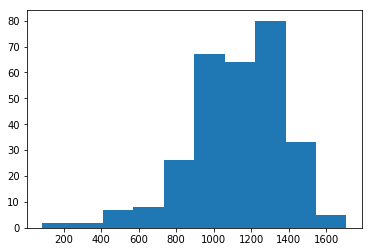

In [148]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

In [152]:
# cool_plots_many(df,'n_compounds_new')

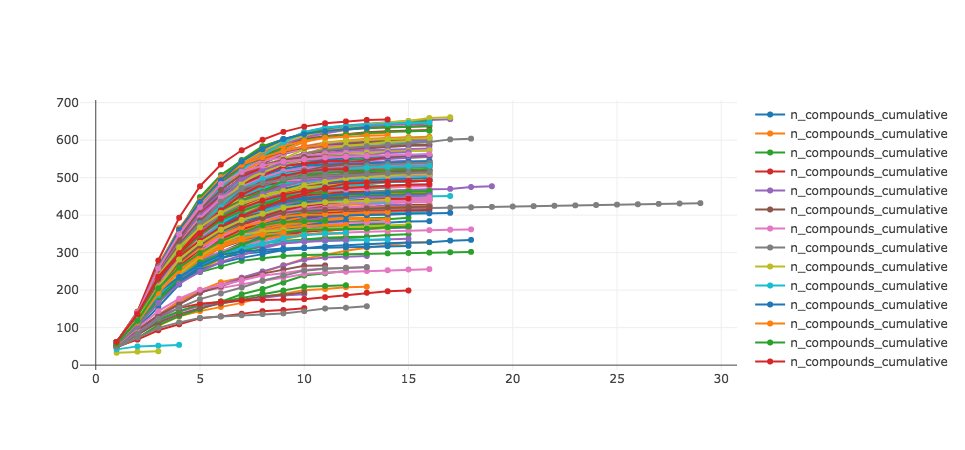

In [150]:
cool_plots_many(df,'n_compounds_cumulative')

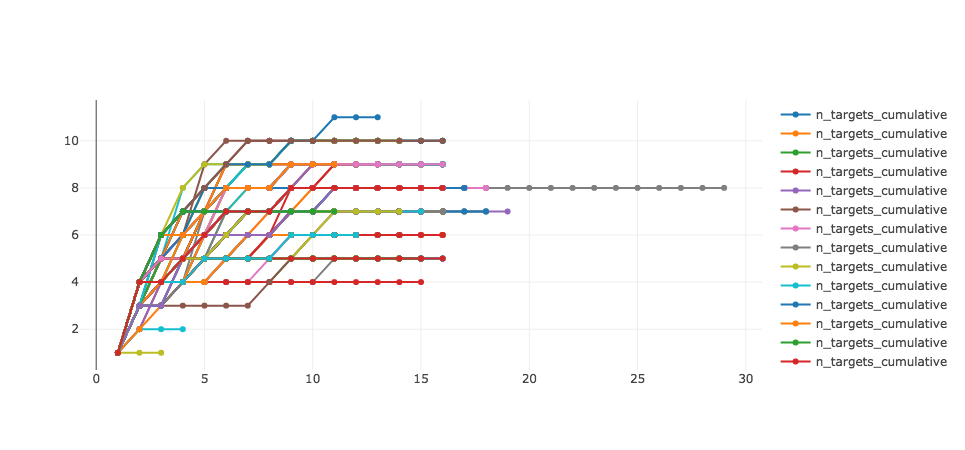

In [151]:
cool_plots_many(df,'n_targets_cumulative')

## - This lets me know that I need to start with targets and work backwards to try and figure out seeds necessary to produce those targets.

## Using all KEGGs reactions

In [154]:
INDIR = "../results/formatted/kegg_edge_json/"

generation_dfs, stats_dicts = read_formatted_json_single(INDIR)
# print len(generation_dfs)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = generation_dfs[0]

In [155]:
len(stats_dicts[0])

7

In [156]:
df.head()

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00001, C01326, C00132, C00067, C00014, C1150...","[C06547, C20783, C01548, C00014, C00011, C0006...","[R10092, R05539, R09139, R00067, R00132, R0235...","[R10535, R10079, R10092, R00131, R09139, R0538...",[],[],18,18,23,23,0,0,reaction_edge,bacteria
2,"[C00001, C00080, C00007, C00026, C01326, C0013...","[C00080, C00007, C00026, C00288, C05359, C0002...","[R10092, R00608, R05539, R00279, R09139, R0006...","[R00608, R00279, R03546, R09144, R07803, R0478...",[],[],41,23,59,36,0,0,reaction_edge,bacteria
3,"[C00001, C00080, C00007, C00026, C00048, C0132...","[C00048, C00025, C00704, C00022, C00222, C0021...","[R00782, R10092, R00608, R00258, R05539, R0027...","[R00782, R00258, R00475, R00008, R01874, R0537...",[C00025],[C00025],67,26,147,88,1,1,reaction_edge,bacteria
4,"[C00001, C00080, C00007, C00026, C00048, C0132...","[C00036, C00546, C00097, C00037, C00065, C0006...","[R00340, R00363, R00782, R10092, R10178, R0060...","[R00340, R00363, R10178, R02914, R09648, R0156...","[C00025, C00097, C00037, C00065, C00064, C00041]","[C00097, C00037, C00065, C00064, C00041]",146,79,288,141,6,5,reaction_edge,bacteria
5,"[C00001, C00080, C00007, C02107, C00026, C0382...","[C02107, C03826, C00383, C02091, C00108, C0095...","[R00340, R09186, R10908, R03106, R03551, R0369...","[R09186, R10908, R03106, R03551, R03694, R0696...","[C00025, C00097, C00037, C00065, C00064, C0004...","[C00049, C00188]",244,98,393,105,8,2,reaction_edge,bacteria


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 17.5,  17.6,  17.7,  17.8,  17.9,  18. ,  18.1,  18.2,  18.3,
         18.4,  18.5]),
 <a list of 10 Patch objects>)

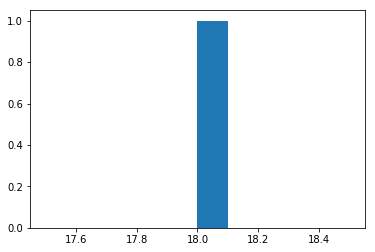

In [157]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 62.5,  62.6,  62.7,  62.8,  62.9,  63. ,  63.1,  63.2,  63.3,
         63.4,  63.5]),
 <a list of 10 Patch objects>)

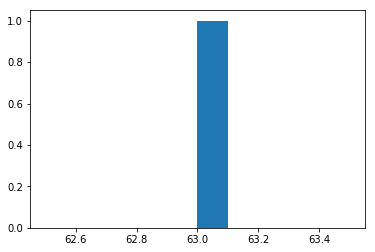

In [158]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 8278.5,  8278.6,  8278.7,  8278.8,  8278.9,  8279. ,  8279.1,
         8279.2,  8279.3,  8279.4,  8279.5]),
 <a list of 10 Patch objects>)

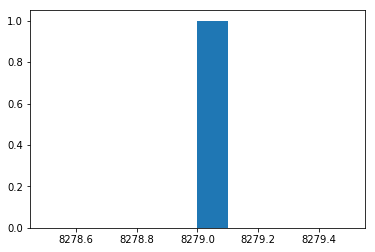

In [159]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 10286.5,  10286.6,  10286.7,  10286.8,  10286.9,  10287. ,
         10287.1,  10287.2,  10287.3,  10287.4,  10287.5]),
 <a list of 10 Patch objects>)

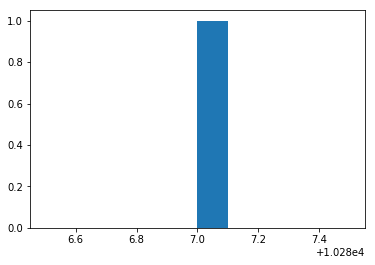

In [160]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

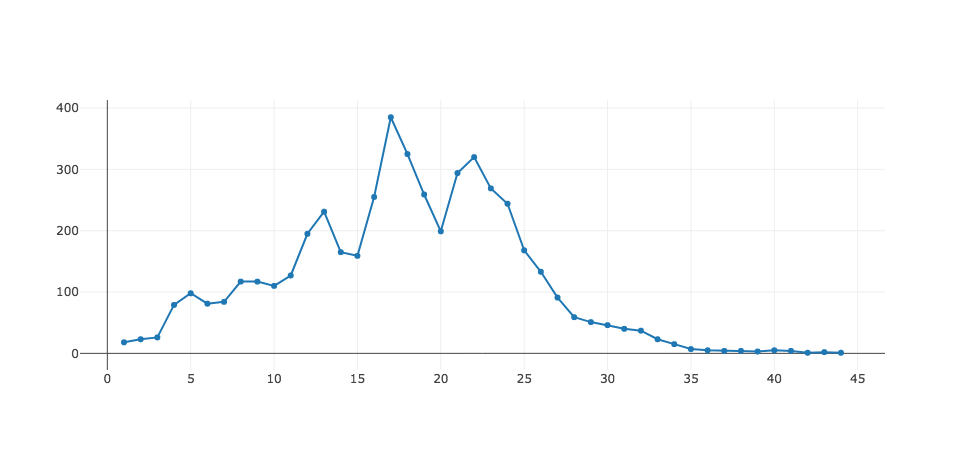

In [161]:
cool_plots_many(df,'n_compounds_new')

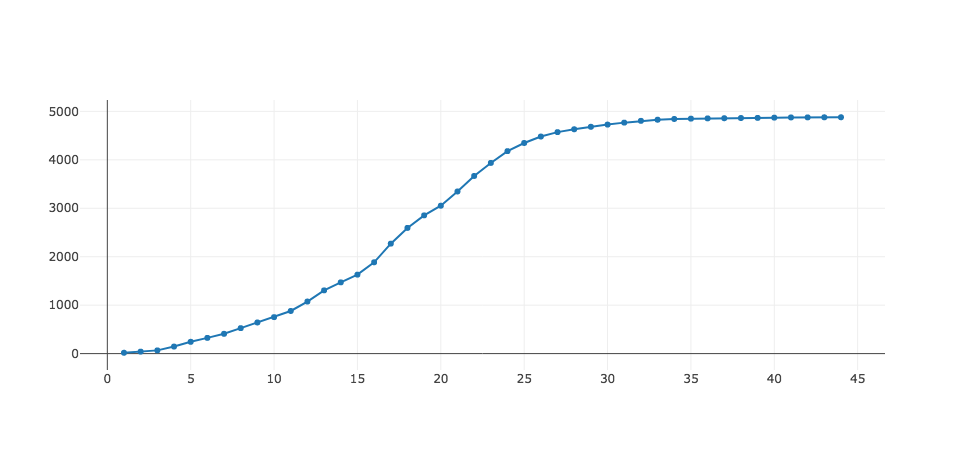

In [162]:
cool_plots_many(df,'n_compounds_cumulative')

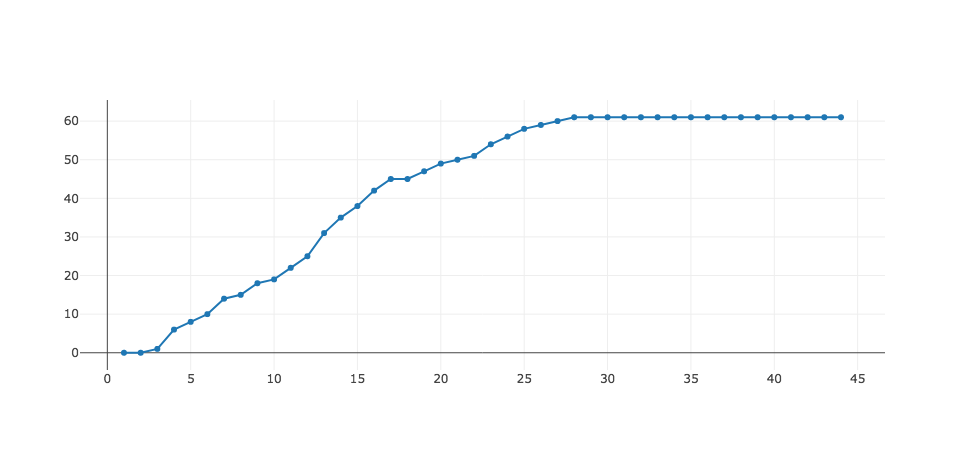

In [163]:
cool_plots_many(df,'n_targets_cumulative')

### Check if the targets columns were erroneous

#### Add map pathway data too?

#### Adding target data could be done post-processing as well

In [168]:
set(datajson["stats"]["scope_targets"])&set(generations["compounds_cumulative"][25])

set()

In [169]:
generations['compounds_cumulative'].apply(lambda x: [cpd for cpd in datajson["stats"]["scope_targets"] if cpd in x])


1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
14    []
15    []
16    []
17    []
18    []
19    []
20    []
21    []
22    []
23    []
24    []
25    []
Name: compounds_cumulative, dtype: object

#### They don't appear to be.

## Plot

In [22]:
def cool_plots(df,line1,line2):

    # Create traces
    trace0 = go.Scatter(
        x = df.index,
        y = df[line1],
        mode = 'lines+markers+text',
        name = line1,
        text=df['tags'],
        textposition='top center'
    #     text= data['state']
    )
    trace1 = go.Scatter(
        x = df.index,
        y = df[line2],
        mode = 'lines+markers',
        name = line2
    )

    data = [trace0,trace1]
    plotly.offline.iplot(data)

In [41]:
df["org_id"].unique()

array(['2506520044', '2506783009', '2517287024', '2529293002',
       '2529293211', '2531839260', '2554235474', '2554235476',
       '2554235477', '2554235490', '2554235497', '2718217646',
       '2718217664', '2718217665', '2718217666', '2718217667',
       '2721755430', '2721755431', '2721755892', '2721755895',
       '2724679803', '2728369738', '2739367758', '2740891997', '638154515',
       '644736411', '644736412', '650716079', '2515154133', '2515154138',
       '2515154140', '2515154141', '2515154152', '2517572146',
       '2518645608', '2518645611', '2519899518', '2521172661',
       '2523533532', '2523533546', '2523533611', '2523533612',
       '2524614558', '2524614663', '2524614672', '2524614757',
       '2524614857', '2524614862', '2524614884', '2540341173',
       '2546825502', '2546825503', '2558309102', '2563366730',
       '2565956515', '2565956590', '2571042909', '2574179701',
       '2574179723', '2574180435', '2574180450', '2582580728',
       '2582581268', '258258127

In [23]:
def cool_plots_many(df,attribute):
    traces = []
    for i in df["org_id"].unique():
        
        traces.append(go.Scatter(
        x = df.loc[df["org_id"]==i].index,
        y = df.loc[df["org_id"]==i][attribute],
        mode = 'lines+markers',
        name = attribute
        ))
    plotly.offline.iplot(traces)   

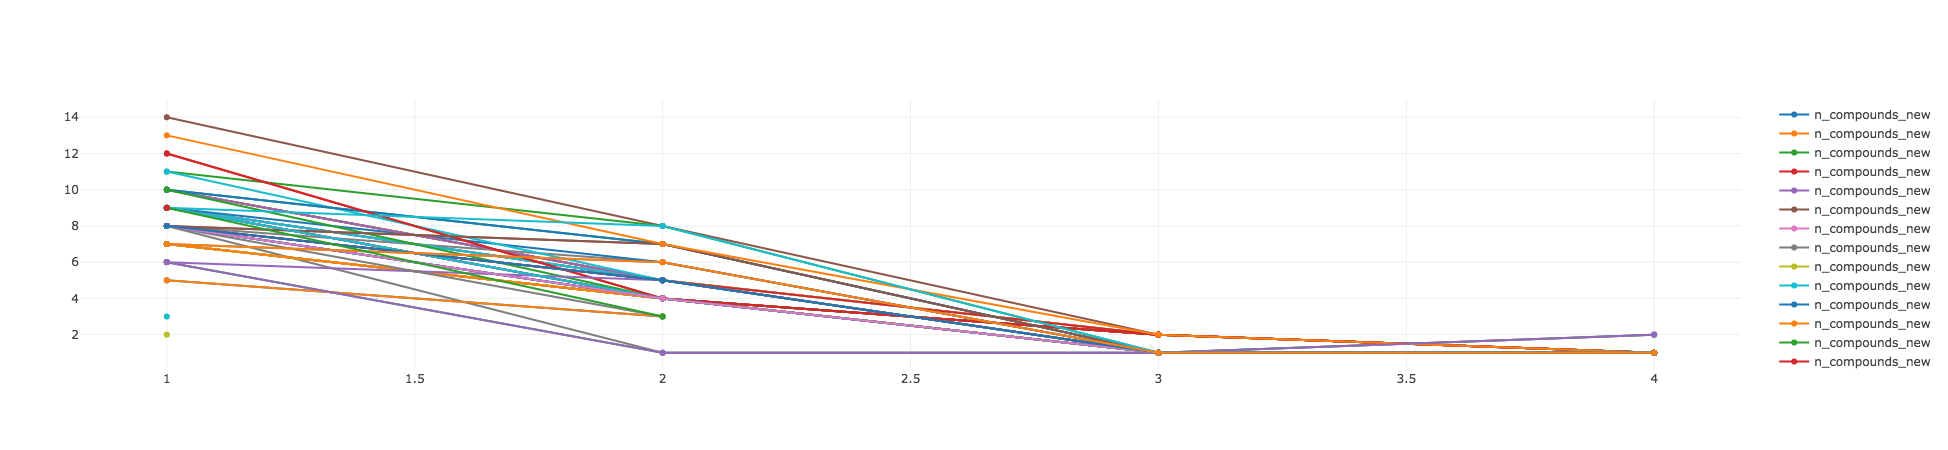

In [47]:
cool_plots_many(df,'n_compounds_new')

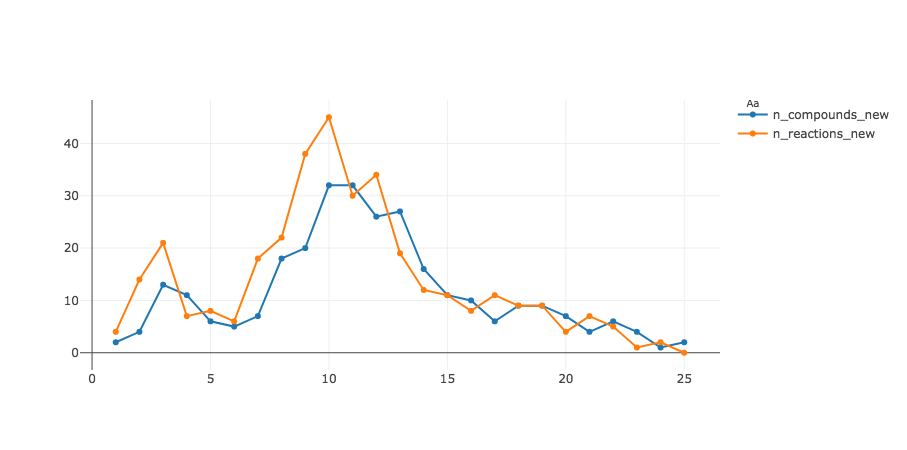

In [178]:
cool_plots(generations,'n_compounds_new','n_reactions_new')

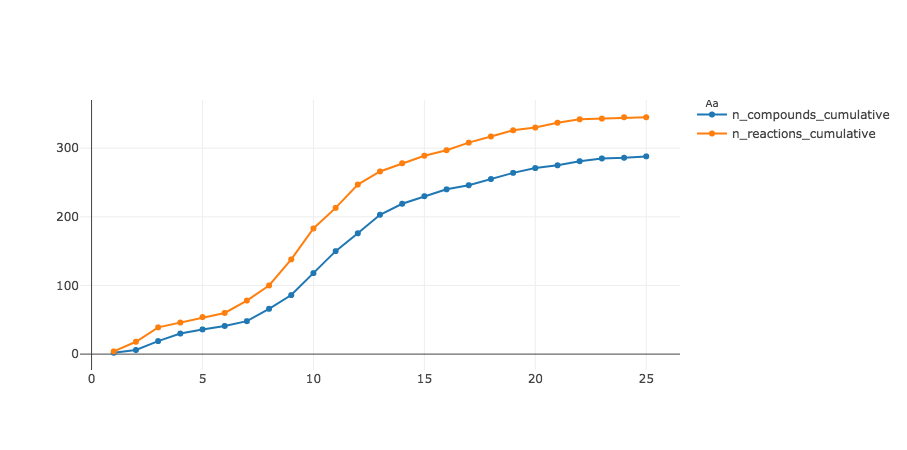

In [179]:
cool_plots(generations,'n_compounds_cumulative','n_reactions_cumulative')